<a href="https://colab.research.google.com/github/ce888-sr/CE888_Lab/blob/main/Lab3/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.preprocessing import LabelEncoder
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from numpy import mean
from numpy import std

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', sep=";")
df1 = df.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#Apply Label encoder to convert strings to integers
df[['y']] = df[['y']].apply(LabelEncoder().fit_transform)
df1 = df.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [4]:
#Apply one-hot coding on categorical values
df = pd.get_dummies(df)
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [5]:
#Delete column named 'Duration'
df_drop = df.drop(['duration'], axis=1)
df_drop.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [6]:
#check if null values
df_drop.isnull().values.any()

False

In [ ]:
df_drop.dtypes

age                       int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
                         ...   
day_of_week_tue           uint8
day_of_week_wed           uint8
poutcome_failure          uint8
poutcome_nonexistent      uint8
poutcome_success          uint8
Length: 63, dtype: object

In [ ]:
print('Number of rows before Na.drop()= %d' % len(df_drop))
df_drop = df_drop.dropna()
print('Number of rows after Na.drop()= %d' % len(df_drop))

Number of rows before Na.drop()= 41188
Number of rows after Na.drop()= 41188


In [ ]:
df_drop.astype(int)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,93,-36,4,5191,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1,93,-36,4,5191,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1,93,-36,4,5191,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1,93,-36,4,5191,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1,93,-36,4,5191,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1,94,-50,1,4963,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1,94,-50,1,4963,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1,94,-50,1,4963,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1,94,-50,1,4963,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [ ]:
df1[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']] = df1[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']].apply(LabelEncoder().fit_transform)
df1 = df1.drop(['duration'], axis=1)

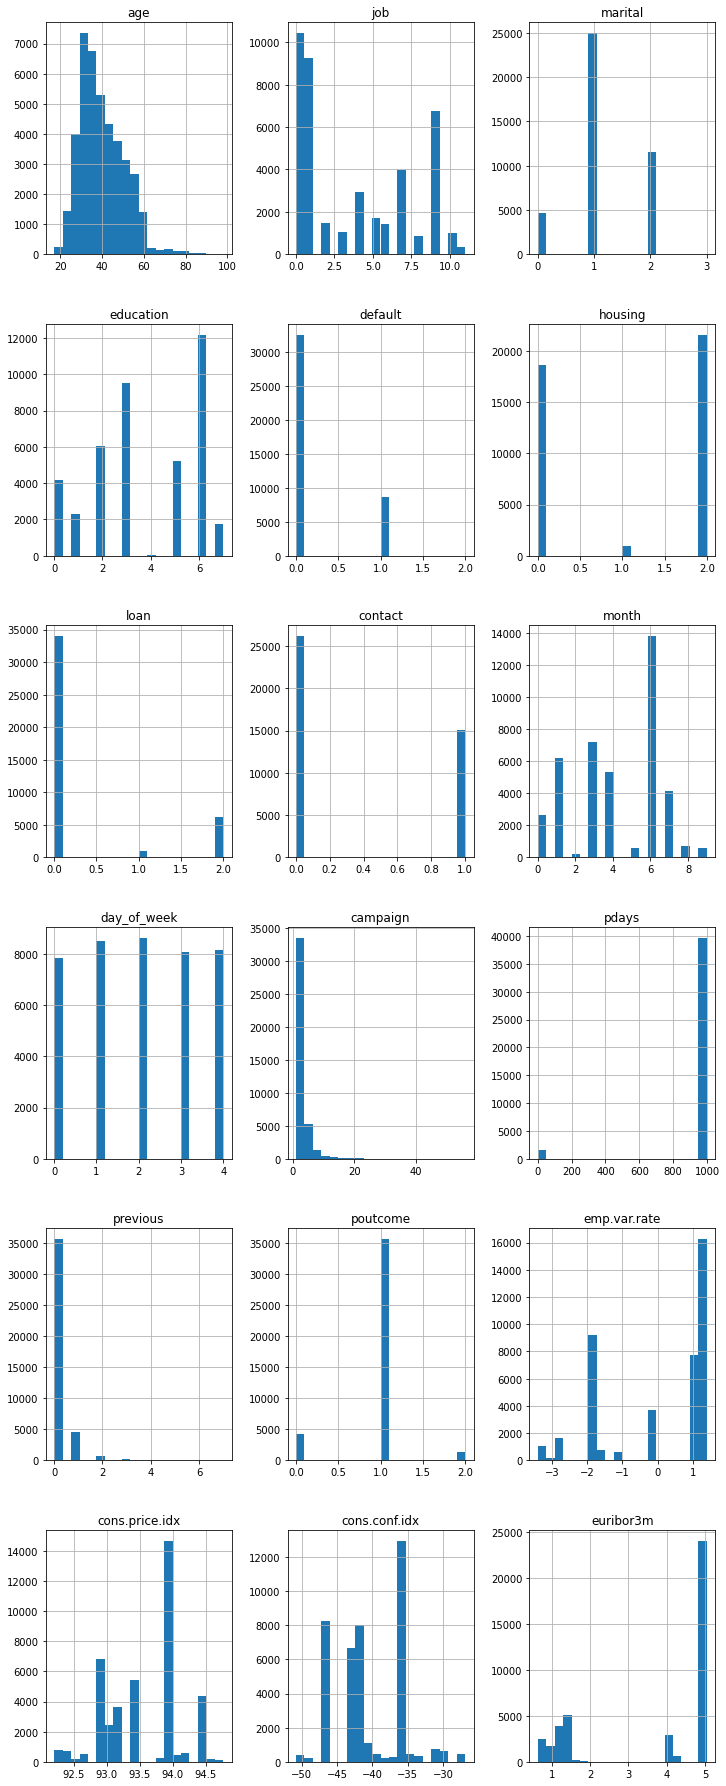

In [ ]:
from itertools import combinations
import matplotlib.pyplot as plt


fig, axes = plt.subplots(len(df1.columns)//3, 3, figsize=(12, 32))

i = 0
for t_axis in axes:
    for axis in t_axis:
        df1.hist(column = df1.columns[i], bins = 20, ax=axis)
        i = i+1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


NameError: ignored

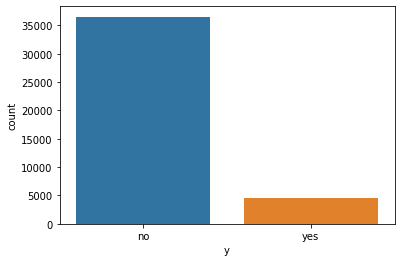

In [ ]:
imb = sns.countplot(df_drop['y'])
imb.set_xticklabels(['no','yes'])
plt.show()

In [7]:
df_drop['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [8]:
#calculate ratio of classes in 
ratio = int(36548/4640)
print("ratio of no's to yes's is", ratio,":1")

ratio of no's to yes's is 7 :1


In [9]:
#split into features and outcome
X, y = df_drop.iloc[:, :-1], df_drop.iloc[:, -1]
X = X.values
y = y.values

In [10]:
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.2, 
                                                    random_state = 50)

In [40]:
#10-fold stratified cross-validation on the training set using a random forest classifier with 100 trees and depth=3. 
clf = RandomForestClassifier(n_estimators = 300,
                             max_depth = 12,
                             class_weight='balanced', 
                             random_state = 60)

In [41]:
cv = StratifiedKFold(n_splits=10,
              #random_state=50,
              shuffle=True)

In [42]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=60, verbose=0,
                       warm_start=False)

In [39]:
# evaluate model
scores = cross_val_score(clf, X_train, y_train, scoring='f1', cv=cv)
# report performance
print('f1_score: %.2f (%.2f)' % (mean(scores), std(scores)))

f1_score: 0.96 (0.02)


In [15]:
y_pred = clf.predict(X_test)

In [16]:
y_error = ((y_test - y_pred)**2).mean()
y_bias = (y_test - np.mean(y_pred, axis=0))**2
v_var = np.var(y_pred, axis=0, ddof=1)

In [17]:
print(y_error)

0.00012138868657441127


In [18]:
dummy_clf = DummyClassifier()
d_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring='f1')

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [19]:
dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring='f1')
print('f1: %.2f (%.2f)' % (mean(d_scores), std(d_scores)))

f1: 0.04 (0.02)


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
rfc=RandomForestClassifier(random_state=50)

In [ ]:
param_grid = { 
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt','log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=cv)

In [ ]:
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=50, max_features='auto', n_estimators= 50, max_depth=5, criterion='entropy')

In [ ]:
rfc1.fit(X_train, y_train)

In [ ]:
# evaluate model
scores = cross_val_score(rfc1, X_train, y_train, scoring='accuracy', cv=cv)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [47]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf],axis=0)
indices = np.argsort(importances)[::-1]

In [48]:
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, [indices[f]], importances[indices[f]]))

Feature ranking:
1. [2] (0.277259)
2. [61] (0.188228)
3. [3] (0.177784)
4. [8] (0.064130)
5. [7] (0.060107)
6. [60] (0.057096)
7. [4] (0.055794)
8. [9] (0.039092)
9. [6] (0.018761)
10. [5] (0.014168)
11. [44] (0.010989)
12. [43] (0.007279)
13. [0] (0.003990)
14. [34] (0.003383)
15. [51] (0.003000)
16. [35] (0.002035)
17. [1] (0.002014)
18. [54] (0.001431)
19. [53] (0.001282)
20. [11] (0.001112)
21. [48] (0.001046)
22. [45] (0.000633)
23. [49] (0.000623)
24. [52] (0.000613)
25. [55] (0.000587)
26. [28] (0.000414)
27. [15] (0.000386)
28. [17] (0.000373)
29. [32] (0.000359)
30. [46] (0.000340)
31. [50] (0.000300)
32. [23] (0.000286)
33. [29] (0.000279)
34. [57] (0.000277)
35. [37] (0.000277)
36. [18] (0.000276)
37. [39] (0.000270)
38. [59] (0.000259)
39. [22] (0.000258)
40. [24] (0.000247)
41. [10] (0.000237)
42. [56] (0.000234)
43. [42] (0.000225)
44. [58] (0.000219)
45. [40] (0.000201)
46. [31] (0.000200)
47. [19] (0.000200)
48. [12] (0.000198)
49. [26] (0.000193)
50. [20] (0.000173)
51

In [50]:
df.columns[60]

'day_of_week_wed'